In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data

Mounted at /gdrive
/gdrive/MyDrive/data


In [ ]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# import more libraries


# splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

#models used
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#assessing the accuracy of the models - metrics
## from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


I will import the dataset regarding "Factors that effect on energy efficiency (regression)"

In [ ]:
# import dataset

df = pd.read_excel('ENB2012_data.xlsx')

In [ ]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Assessing more information about the df:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Two indipendendent variables with integer values (x6= orientation, x8=Glazing Area Distribution), while all the other variables as continuous.

Check if there are null values:

In [ ]:
df.isnull().sum()

,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
Y1,0
Y2,0


In [ ]:
df.isna().sum()

,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
Y1,0
Y2,0


No null value, so i can proceed with the analysis.

In [ ]:
# understand more details

df.describe().round(2)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,0.76,671.71,318.50,176.60,5.25,3.50,0.23,2.81,22.31,24.59
std,0.11,88.09,43.63,45.17,1.75,1.12,0.13,1.55,10.09,9.51
min,0.62,514.50,245.00,110.25,3.50,2.00,0.00,0.00,6.01,10.90
25%,0.68,606.38,294.00,140.88,3.50,2.75,0.10,1.75,12.99,15.62
50%,0.75,673.75,318.50,183.75,5.25,3.50,0.25,3.00,18.95,22.08
75%,0.83,741.12,343.00,220.50,7.00,4.25,0.40,4.00,31.67,33.13
max,0.98,808.50,416.50,220.50,7.00,5.00,0.40,5.00,43.10,48.03


I will create a new df subsituting the variables name:

In [ ]:
renamed = df.rename(columns={
    'X1': 'relative_compactness',
    'X2': 'surface_area',
    'X3': 'wall_area',
    'X4': 'roof_area',
    'X5': 'overall_height',
    'X6': 'orientation',
    'X7': 'glazing_area',
    'X8': 'glazing_area_dist',
    'Y1': 'heating_load',
    'Y2': 'cooling_load'
})

renamed.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Let's see graphically more pieces of information about the variables:


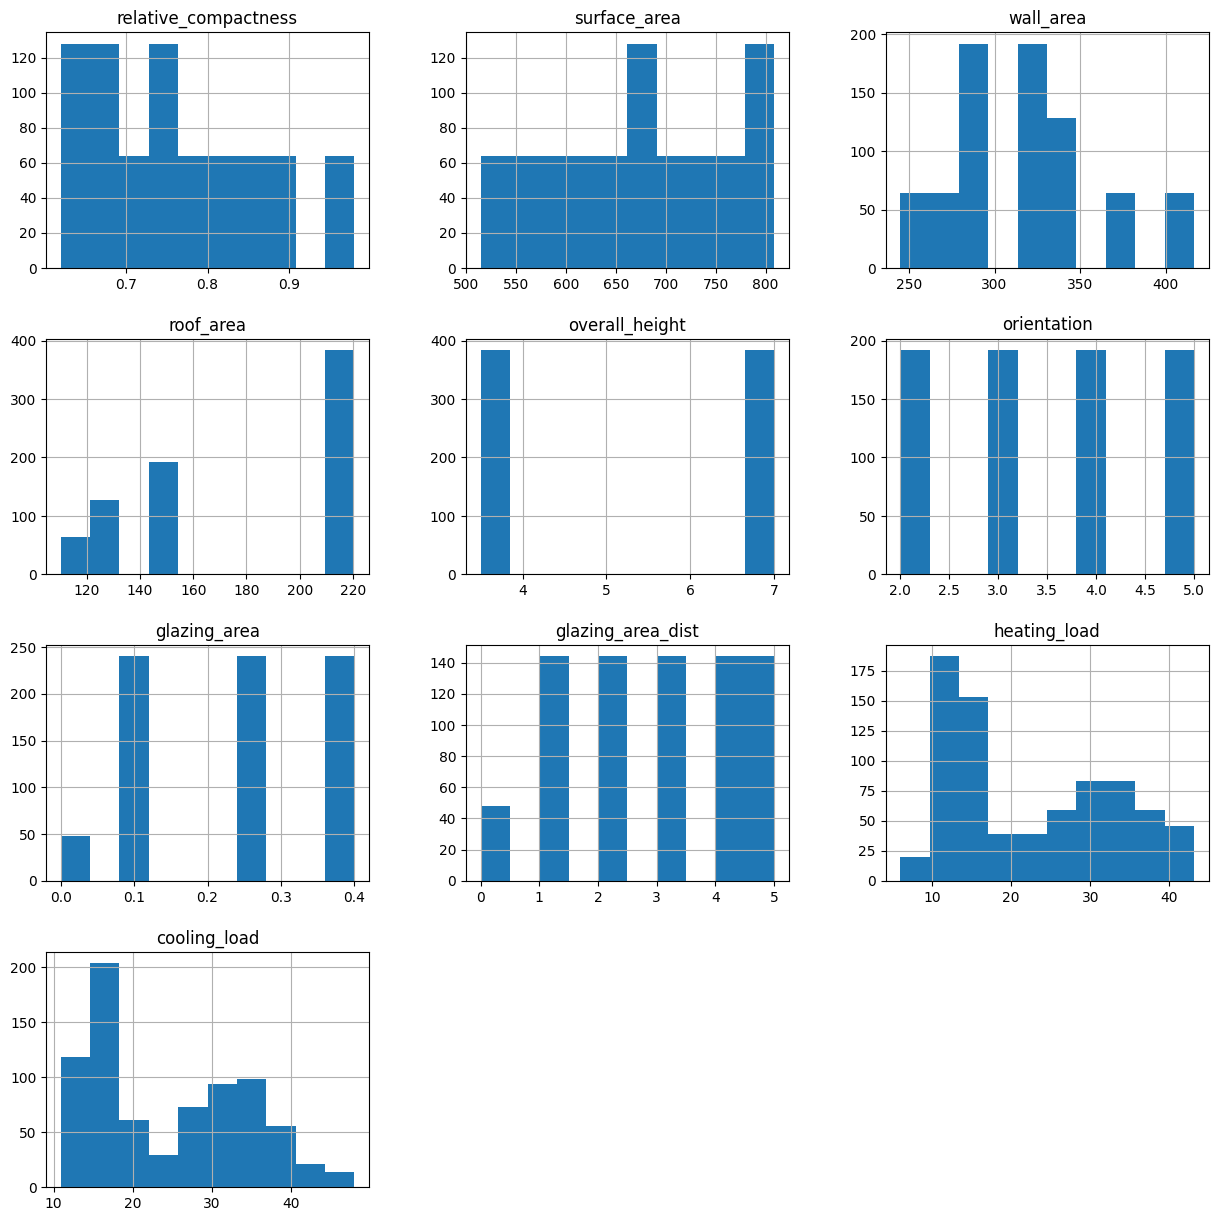

In [ ]:
renamed.hist(figsize=(15,15))
plt.show()

It is interesting to mention that the data seems to be very precise and clearly divides, symptom of an artificial created dataset. Actually, confirming this, the dataset and the buildings characteristics are created beforehand, by default: citing from the paper:

> *taking the elementary cube (3.5 × 3.5 × 3.5) we generated 12 building forms where each building form is composed of 18 elements (elementary cubes). The simulated buildings were generated using Ecotect. All the buildings have the same volume, which is 771.75 m3, but different surface areas and dimensions.*

Let's have a look at dependencies as a scatter chart.

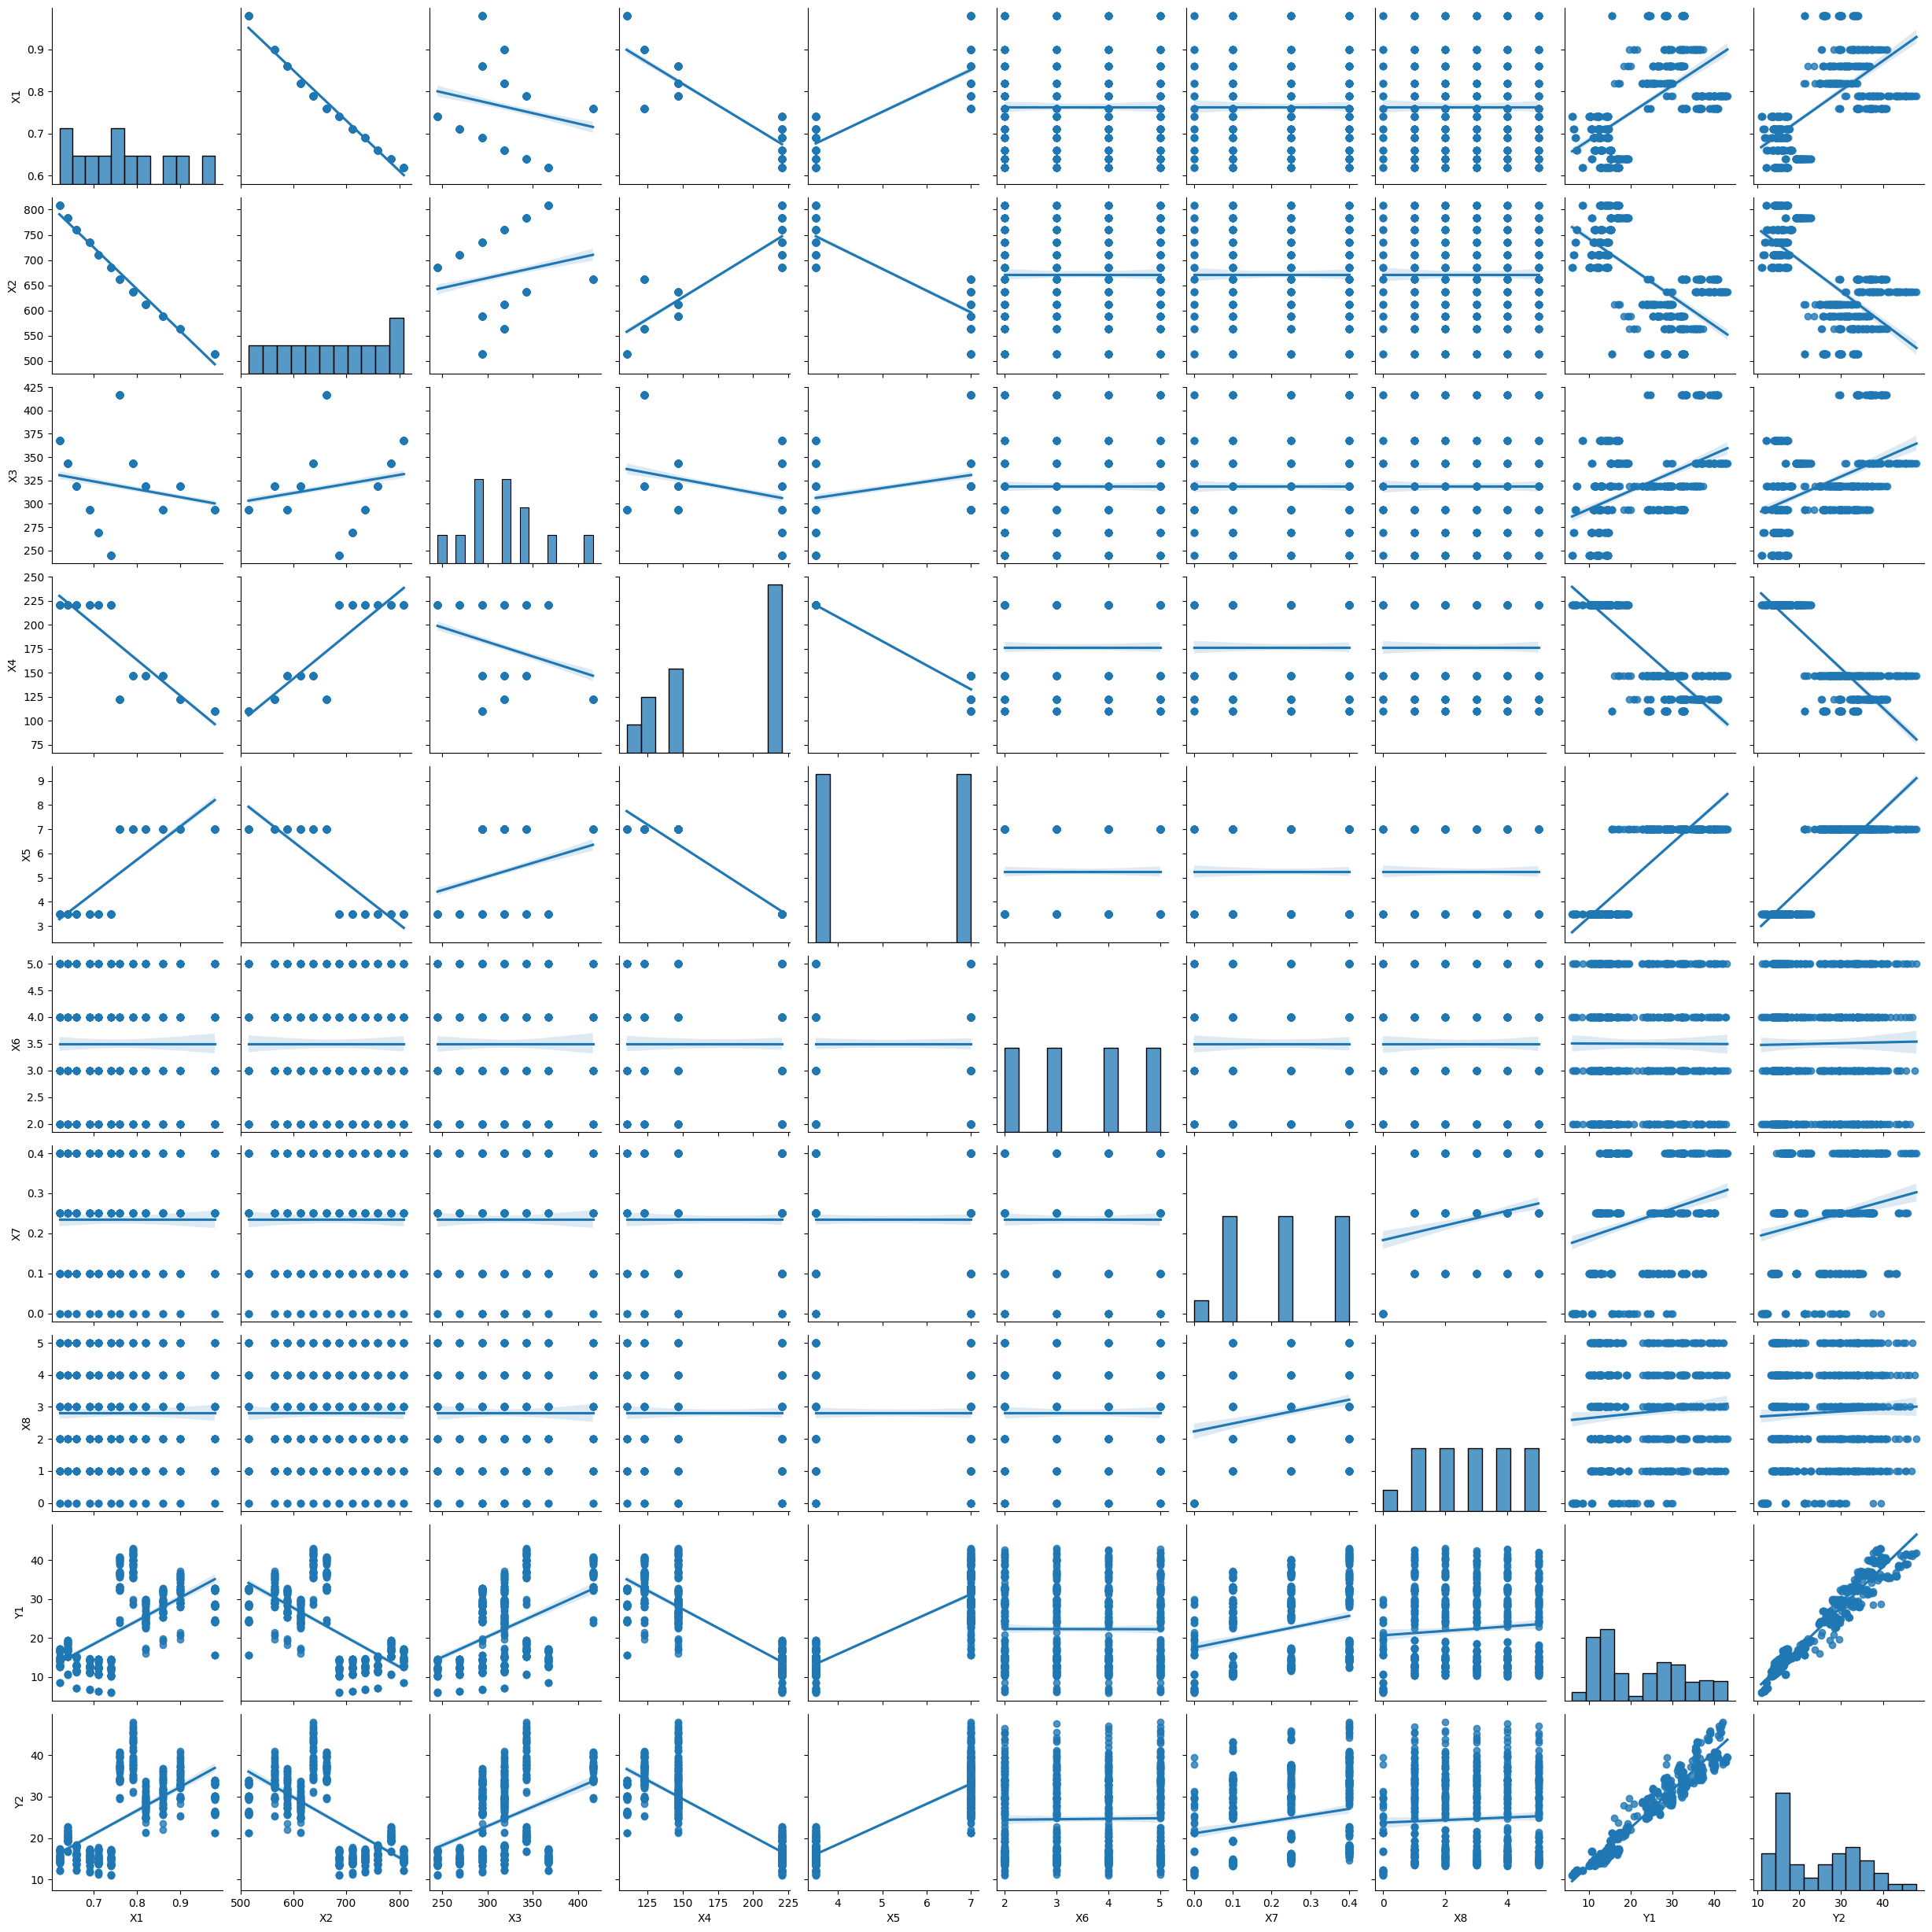

In [ ]:
sns.pairplot(df,kind='reg')

For the graph here above it is possible to assess several interesting insights.
For example, it seems that every variable has the same impact both on heating and cooling load. There are almost no differences between the correlation with the two target variable; for instance, if an indipendent varibale has a negative strong correlation with the target variabel Y1 (heating load), the same effect and the same correlation will show also in the Y2.
This particular effect can be related to several factor, but for example we can assume that the studies on this variables are conducted in a temperate weather or because are gathered enough different information in order to avoid discrepancies due to external factors, such as the temperature. Actually, I assessed that it is an artificial created dataset and doesn't reflect real existing buildings so this is the primarly reason why external factors are smoothed out.

From this plot, I can assess that some variables generate a positive or negate correlation with the target variable (heating load), while others have no correlation. A little bit controintuitively, for example, orientation seems to have no effect on heating load nor on cooling load.

Other quick analysis could be related to the strongest positive correlation, related to the variable X5(Overall height), while the strongest negative correlation seems to be X4(roof area).

Another aspect that is underlined by the graph here above is that the dataset is not very various and the buildings took into account have the same charateristics. To be more precise, for example, variable X5(overall height) has just two values, 3.5 and 7.0. and also X4(roof area) has just 4 values: this reveals some really predictable information, such as that doubling the height, the cooling load would increase almost accordingly. With continuous values and many different heights, maybe more insights could have been drawn.


Here below, I will use other correlation grpah and I will use again the column name of the original dataset to have a better visualization.

<Axes: >

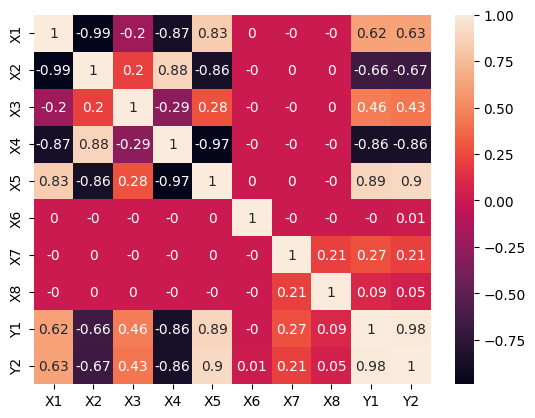

In [ ]:
# different correlation visualization
correlation_matrix=df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

There are several variables with high absolute value of correlation. Nevertheless, while taking into analysis in the model the variables with the highest absolute value of correlation, it is not automatic that all the selected variables took together can lead to an increased correlation.

I will choose Y2 as target variable: let's understand which of the 8 independent variables are more correlated with a specific focus and with the renamed dataset.

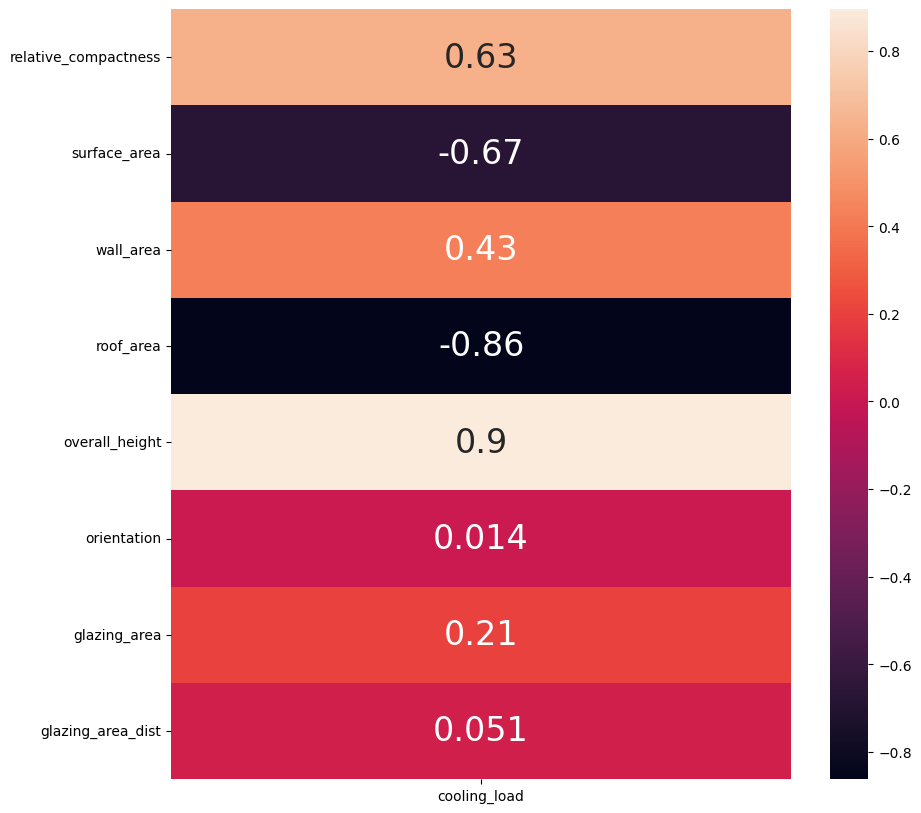

In [ ]:


df_corr_y1 = renamed.corr()['cooling_load'][:-2]
#set fig size
fig, ax = plt.subplots(figsize=(10,10))
#plot matrix
sns.heatmap(df_corr_y1.to_frame(),annot=True, annot_kws={'size':24})
plt.show()



This visualization is helpful when there are many indipendent variables involved, but we have already choose clearly the target variable.

Now I will fit the model, choosing the following 3 variables as indipendent variables and the Y2 (cooling load) as target variable:

* X2	Surface Area

* X5	Overall Height

* X7	Glazing area


Now let's create the machine learning model

In [ ]:
# The coefficient of determination R2 are collected in the list

R2_train=[]
R2_test=[]

# in the code here below you can have empty line but it's important that there is indentation

def modeling(model):
  #fitting the model to train data
  model.fit(x_train,y_train)

  # coefficient of determination R2 for train data
  y_pred_train=model.predict(x_train)
  R2_train_model= r2_score(y_train,y_pred_train)
  R2_train.append(round(R2_train_model,5))

  # coefficient of determination R2 for test data
  y_pred_test=model.predict(x_test)
  R2_test_model= r2_score(y_test,y_pred_test)
  R2_test.append(round(R2_test_model,5))

  # Printing the coefficients of determination
  print("The coefficient of determination R2 for train data:", round(R2_train_model,2))
  print("The coefficient of determination R2 for test data:", round(R2_test_model,2))

  # Train data error terms as a chart
  fig, ax= plt.subplots(1,2, figsize=(10,4))
  ax[0].set_title('Distribution of prediction errors in training data')
  sns.histplot((y_train-y_pred_train), kde= True, ax=ax[0], bins=20, color='skyblue') # Increased bins, added color
  ax[0].set_xlabel('y_train-y_pred_train= Error terms')
  ax[0].set_ylabel('Frequency') # Added y-label

  #realized and predicted values as scatter chart for test data
  ax[1].set_title('Realized and predicted values in test data')
  ax[1].scatter(x=y_test, y=y_pred_test, color='coral', alpha=0.7) # Added color, transparency
  ax[1].set_xlabel('Realized values')
  ax[1].set_ylabel('Predicted values') # Added y-label
  ax[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray') # Added line for reference

  plt.tight_layout() # Improved layout
  plt.show()

  return(model)

Let's understand this dependencies more in the deep.


* X2	Surface Area

* X5	Overall Height

* X7	Glazing area


In [ ]:
# Feature matrix or "variables" - I will use letter X to define the matrix

X= df[['X2', 'X5','X7']]

# Target variable

Y= df['Y2']

#  Splitting the dataset into test and train sets

x_train, x_test, y_train, y_test= train_test_split(X,Y, random_state=1234) # random_state=1234 is a default value

#understand how many values have been taken for train and test
print(x_train.shape)
print(x_test.shape)

(576, 3)
(192, 3)


Train dataset has 570 instances while test dataset has 192 instances.


## Linear Regression model

The coefficient of determination R2 for train data: 0.88
The coefficient of determination R2 for test data: 0.89


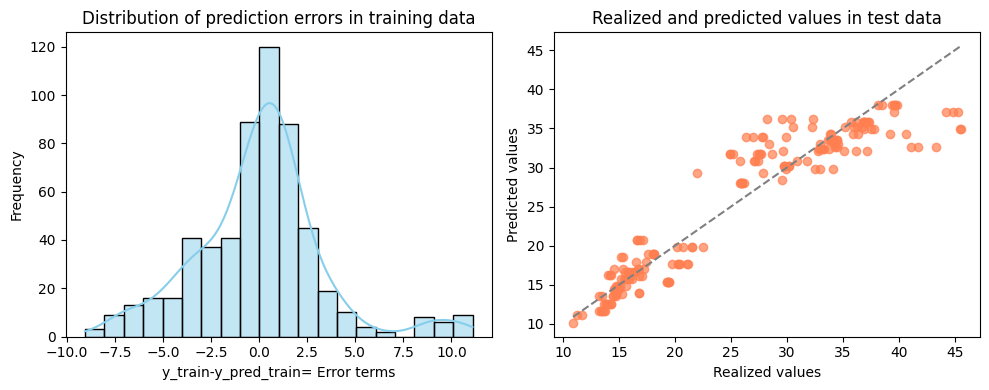

In [ ]:
model= LinearRegression()
lr= modeling(model)

This graph on the left is an histogram that helps to assess how well the Linear Regression model is doing.

The X-axis shows the difference between the actual values and the values predicted by the model, in other words, the 'errors' or 'residuals'.
The Y-axis, instead, shows how many data points have a particular error value.

Ideally, with the highest possible score of the model, this graph should look like a normal distribution centered around zero. The normal distribution of the errors, actually, means that the model is making mostly small errors (represented at the sides of the bell) and is not consistently overestimating or underestimating.

This model present still an high score $R^{2}=0.88$ and actually the "Distribution of prediction errors in training data" graph resemble the graph of a normal distribution, underlining the good quality of the model.

The graph on the left, instead, is a scatter plot where the observed cooling load is plotted against the predicted cooling load. Ideally, the points should be aligned closely around a diagonal line with a slope of 1. This would indicate that the predicted values are very close to the observed values, implying a good model fit.

In this graph, it is possible to clearly assess the clustering around this diagonal line with slope=1, but there are still some errors, with several points scattered and not well aligned. For example, points above the diagonal line, indicate that the model has overestimated the cooling load for those data points.
Points below the diagonal line, instead, suggest that the model has underestimated the cooling load.

In conclusion, the closer the points are to the diagonal line, the better the model is at predicting the cooling load. Deviations from this line provide insights into where the model might be making errors and can guide further improvements.

In [ ]:
### Slope of the regression line.

lr.coef_

array([ 0.03823727,  6.53897982, 14.83951429])

This tells me how heach variable is influencial in predicting the target variable; to get an idea of feature importance, larger absolute values indicate stronger influence (positive or negative). In this speicific case, so, X2(Surface area) is not very relevant while X7 seems to be the highest.

Therefore, based on this model, lower building with small glazing area requires less energy to cool down the indoor environment.

In [ ]:
### Intercept of the regression line.

lr.intercept_

np.float64(-38.96841763774107)

This intercept provides me the predicted value of the target variable when all input features are zero. In my case, the model predicts a cooling load of -38.97 when the surface area, overall height, and glazing area are all zero. This function can have some useful application for some cases, even though in this specific dataset and analysis it is completely meaningless, since there is no sense in thinking about an hypotetical building with, for example, height=0 meters.

## Random Forest Regression model

The coefficient of determination R2 for train data: 0.97
The coefficient of determination R2 for test data: 0.97


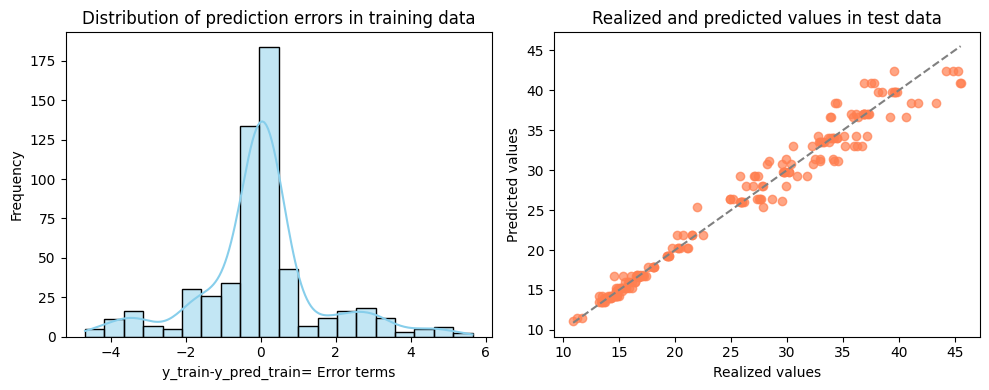

In [ ]:
model= RandomForestRegressor()
rfr= modeling(model)

This graph on the left is an histogram that helps to assess how well the Random Forest Regression model is doing.

The X-axis shows the difference between the actual values and the values predicted by the model, in other words, the 'errors' or 'residuals'.
The Y-axis, instead, shows how many data points have a particular error value.

Ideally, with the highest possible score of the model, this graph should look like a normal distribution centered around zero. The normal distribution of the errors, actually, means that the model is making mostly small errors (represented at the sides of the bell) and is not consistently overestimating or underestimating.

This model present still an high score $R^{2}=0.97$ and actually the "Distribution of prediction errors in training data" graph represent almost perfectly a normal distribution, underlining the extreme quality of the model.

In this graph, on the right, the points are almost completely aligned on a diagonal line with slope= 1, suggesting that the model is performing extremely well in predicting the cooling load.

  Feature  Importance
1      X5    0.594474
0      X2    0.351802
2      X7    0.053724


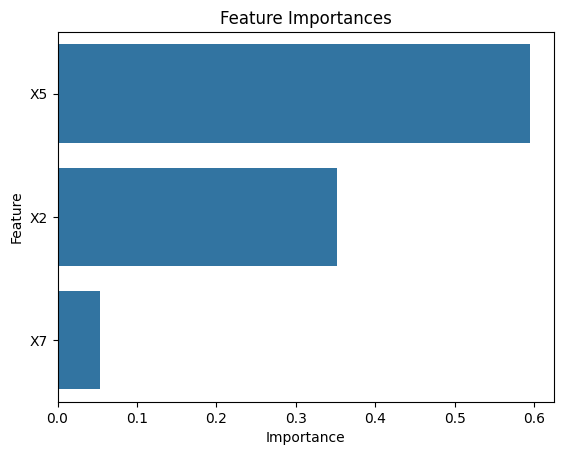

In [ ]:
importances = rfr.feature_importances_  # For RandomForestRegressor

feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

# plot the feature importances:
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

This graph can offer a representation of which features are most influential in predicting the target variable. Conversely with the regression model, the most influencial variable here is X5(Overall_height).

Therefore, based on this model, lower building with small glazing area requires less energy to cool down the indoor environment.

## Gradient boosting regression model

The coefficient of determination R2 for train data: 0.97
The coefficient of determination R2 for test data: 0.97


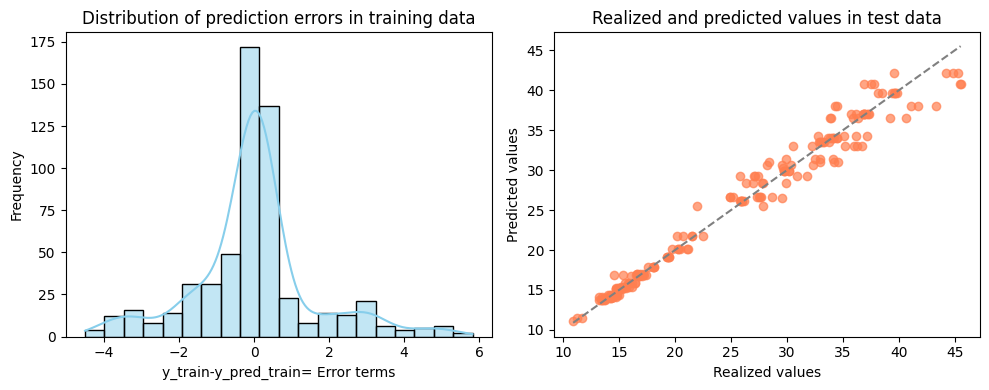

In [ ]:
model= GradientBoostingRegressor()
gbr= modeling(model)

Also in this Gradient Boosting model the score $R^{2}=0.97$ and actually the "Distribution of prediction errors in training data" graph represent almost perfectly a normal distribution, underlining the extreme quality of the model.

Also in this case, in the graph on the right, the points are almost completely aligned on a diagonal line with slope= 1, suggesting that the model is performing extremely well in predicting the cooling load.

Let's visualize numerically these predictions:

In [ ]:
subset1= df[['X2', 'X5','X7','Y2']]

new_data_X = subset1[['X2', 'X5','X7']]

# Make predictions
predictions = model.predict(new_data_X)

# Add predictions to the new data DataFrame
subset1['predictions'] = predictions

# View the predictions
subset1.head()

/tmp/ipython-input-687034533.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset1['predictions'] = predictions


,X2,X5,X7,Y2,predictions
0,514.5,7.0,0.0,21.33,21.430604
1,514.5,7.0,0.0,21.33,21.430604
2,514.5,7.0,0.0,21.33,21.430604
3,514.5,7.0,0.0,21.33,21.430604
4,563.5,7.0,0.0,28.28,26.466995


Here below a recap of the three models in a chart

In [ ]:


method = ["LinearRegression", "RandomForestRegressor", "GradientBoostingRegressor"]
pd.DataFrame({'Model': method, 'The coefficient of determination (train data)':R2_train, 'The coefficient of determination (test data)':R2_test})



,Model,The coefficient of determination (train data),The coefficient of determination (test data)
0,LinearRegression,0.87766,0.88591
1,RandomForestRegressor,0.97097,0.97414
2,GradientBoostingRegressor,0.97082,0.97396


**Conclusions**
For all the three models, an high R² on both train and test is showed, and this indicates that my model generalizes well, without overfitting.

The residuals distribution Appears roughly normal and centered around zero, which is a good sign of well-behaved errors.

The Predicted vs Actual Plot Shows a strong linear relationship along the 45-degree line, confirming good predictions.

## create new values

In [ ]:
# Create a DataFrame with new values for the features
new_data = pd.DataFrame({
    'X2': [200, 400, 1200, 1200],  #  Surface Area
    'X5': [3.5, 7.0, 10.5, 10.5], # Overall Height
    'X7': [0.1, 0.2, 0.5, 0.1]   # Glazing area
})

new_data.head()

,X2,X5,X7
0,200,3.5,0.1
1,400,7.0,0.2
2,1200,10.5,0.5
3,1200,10.5,0.1


In [ ]:
# Make predictions using the new created dataset
predictions2 = model.predict(new_data)

# Print the predictions
predictions2

array([21.32484424, 29.84042511, 26.46594422, 21.74592863])

So, according to this model:
* A building with a surface area of 200, overall height of 3.5, and glazing area of 0.1 is predicted to have a cooling load of 22.27;
* A building with a surface area of 400, overall height of 7.0, and glazing area of 0.2 is predicted to have a cooling load of 29.84.
* A building with a surface area of 1200, overall height of 10.5, and glazing area of 0.5 is predicted to have a cooling load of 23.17.
* A building with a surface area of 1200, overall height of 10.5, and glazing area of 0.1 is predicted to have a cooling load of 20.19.

_-----------------------------------------------------------------------------------------------------------------------------

# Further analysis

Now, I will do an analysis that seems very reasonable, but let's check if the regression model confirms the hypotesis or not:

I can assume that take into account orientation of a building (X6) and its glazing area (X7) could  influence the cooling load of the same. Actually, the reasoning behind this is that if the building is oriented in a certain way, maybe towards the sun and the building has also a relevant amount of glazing area, this double factor could increase a lot the cooling load.

In [ ]:
# Feature matrix or "variables" - I will use letter X to define the matrix

X= df[['X6','X7']]

# Target variable

Y= df['Y2']

#  Splitting the dataset into test and train sets

x_train, x_test, y_train, y_test= train_test_split(X,Y, random_state=1234) # random_state=1234 is a default value

## Linear Regression model

The coefficient of determination R2 for train data: 0.04
The coefficient of determination R2 for test data: 0.04


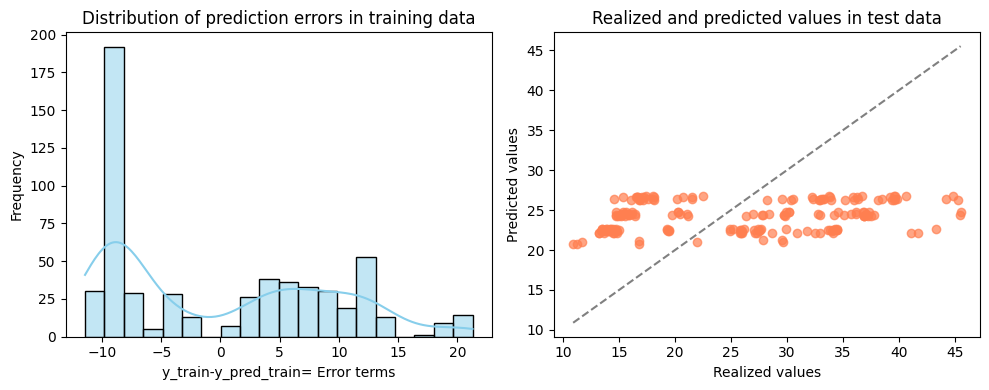

In [ ]:
model= LinearRegression()
lr1= modeling(model)

The coefficient of determination R2 for train data: 0.05
The coefficient of determination R2 for test data: -0.01


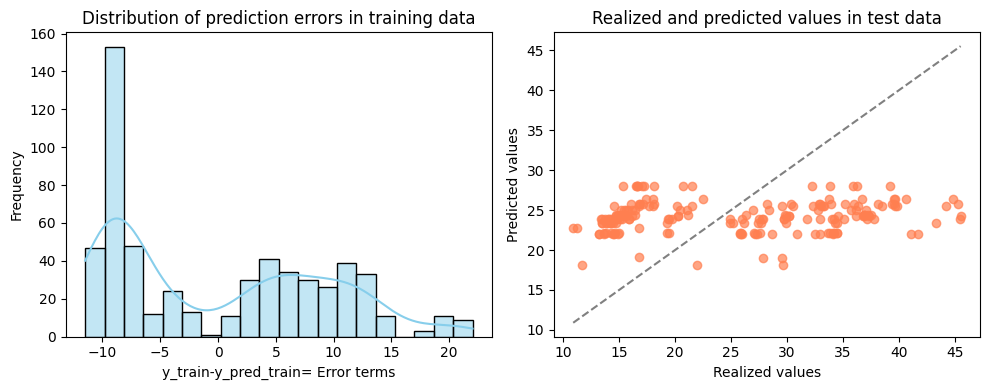

In [ ]:
model= RandomForestRegressor()
rfr1= modeling(model)

The coefficient of determination R2 for train data: 0.05
The coefficient of determination R2 for test data: -0.01


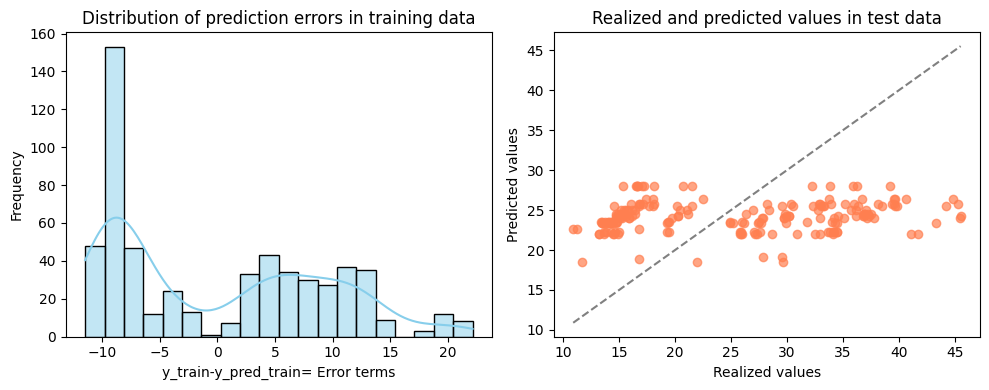

In [ ]:
model= GradientBoostingRegressor()
gbr1= modeling(model)

The results don't confirm the hypoteses above, since the coefficient of determination is very low, indicating almost randomized values and predictions.
So, there is no correlation between the two indipendent variables and the target Y2.

This can happens for several various reasons related to the dataset, for example, the hypotesis would have been confirmed maybe if the data were collected during the summer or in hot places, while maybe these data are not related to buildings in cold zones or not sunny at all.

-------------------------------------------------------------------------